In [16]:
# install pandas
!pip install pandas

# Word Frequencies Calculation

In [17]:
# import pandas and re
import pandas as pd
import re
from collections import Counter

In [18]:
# define the file path which stores the metadata
csv_file_path = 'C:/Users/10924/Desktop/CD_GP/metadata_improved.csv'

#define word lists
left_wing_phrases = ['people of color', 'dogmatism ', 'populist', 'working class ', 'right wing ', 'alt right', 'safety net', 'extremist', 'white privilege', 'climate science', 'undocumented immigrant', 'black lives matter', 'trigger warnings', 'microaggressions', 'privilege', 'cultural appropriation']
right_wing_phrases = ['snowflake', 'entitlements', 'illegal alien', 'all lives matter', 'cultural elite', 'make .* great again', 'assault on the canon', '.* first', 'china virus', 'enemy of the people', 'fake news', 'political correctness', 'globalist', 'hoax', 'triggered', 'witch-hunt']

In [19]:
# read the csv file
df = pd.read_csv(csv_file_path)

In [20]:
# define counters to store outcome
left_wing_counts = Counter()
right_wing_counts = Counter()

In [21]:
# converts the 'Text' column to string type
df['Text'] = df['Text'].astype(str)

In [22]:
# loop through each article in the 'Text' column of the DataFrame
for text in df['Text']:
    
    # convert the text to lowercase to ensure case-insensitive matching
    text_lower = text.lower()
    
    # loop through each phrase in the left-wing phrases list
    for phrase in left_wing_phrases:
        
        # count the occurrences of the phrase in the text
        # re.escape is used to escape any special characters in the phrase
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        
        # update the count of the phrase in the left-wing counter
        left_wing_counts[phrase] += phrase_count
        
    # loop through each phrase in the right-wing phrases list
    for phrase in right_wing_phrases:
        
        # similar to above, count the occurrences of the phrase in the text
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        
        # update the count of the phrase in the right-wing counter
        right_wing_counts[phrase] += phrase_count

In [23]:
# print left-wing word frequencies and right-wing word frequencies
print("Left-wing word frequencies:", left_wing_counts)
print("Right-wing word frequencies:", right_wing_counts)

Left-wing word frequencies: Counter({'extremist': 43, 'populist': 27, 'privilege': 20, 'black lives matter': 12, 'right wing ': 1, 'safety net': 1, 'climate science': 1, 'people of color': 0, 'dogmatism ': 0, 'working class ': 0, 'alt right': 0, 'white privilege': 0, 'undocumented immigrant': 0, 'trigger warnings': 0, 'microaggressions': 0, 'cultural appropriation': 0})
Right-wing word frequencies: Counter({'triggered': 50, 'fake news': 18, 'entitlements': 3, 'snowflake': 2, 'political correctness': 2, 'globalist': 2, 'witch-hunt': 2, 'hoax': 1, 'illegal alien': 0, 'all lives matter': 0, 'cultural elite': 0, 'make .* great again': 0, 'assault on the canon': 0, '.* first': 0, 'china virus': 0, 'enemy of the people': 0})


In [25]:
# import 'matplotlib' library
import matplotlib.pyplot as plt

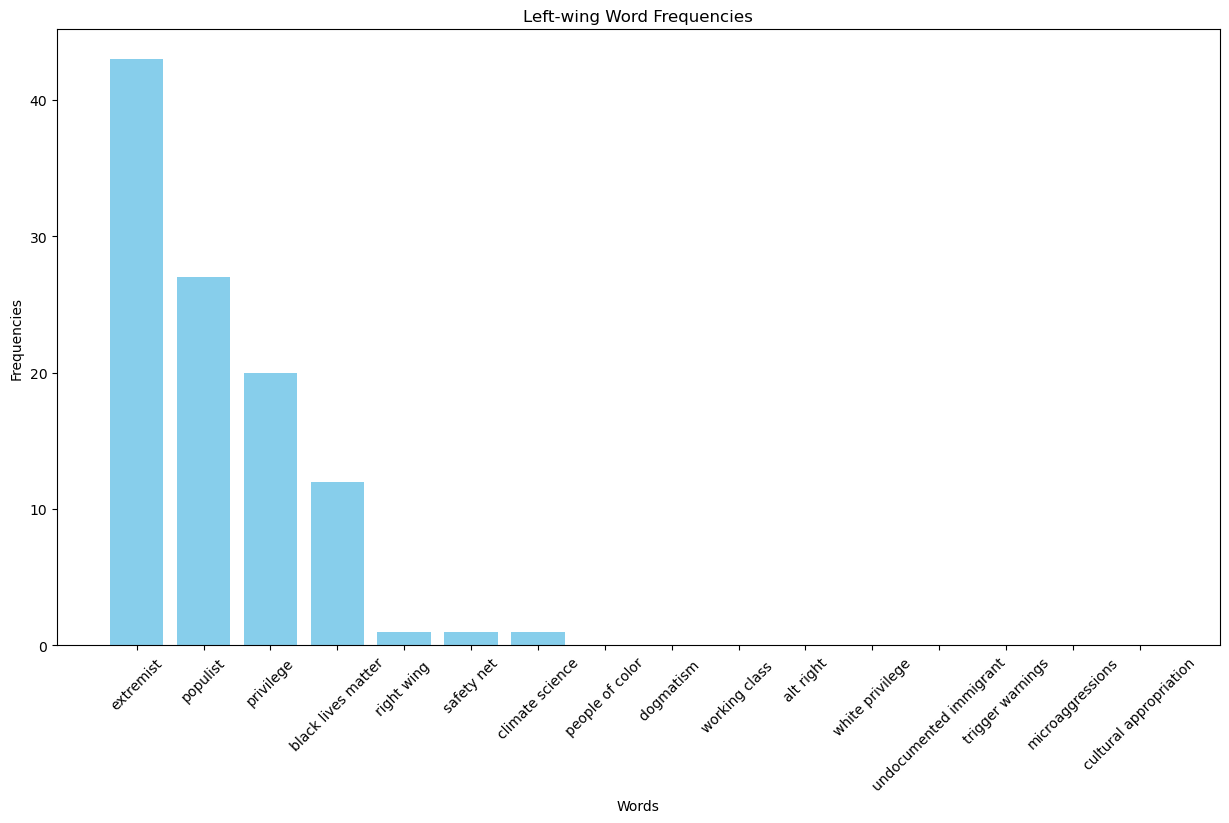

In [26]:
# extract left-wing words data and sort it
left_labels, left_values = zip(*sorted(left_wing_counts.items(), key=lambda x: x[1], reverse=True))

# create a bar chart for left-wing word frequencies
plt.figure(figsize=(15, 8))
plt.bar(left_labels, left_values, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Left-wing Word Frequencies')
plt.xticks(rotation=45)  
plt.show()

In [27]:
# install wordcloud module
!pip install wordcloud

In [28]:
# import word cloud
from wordcloud import WordCloud

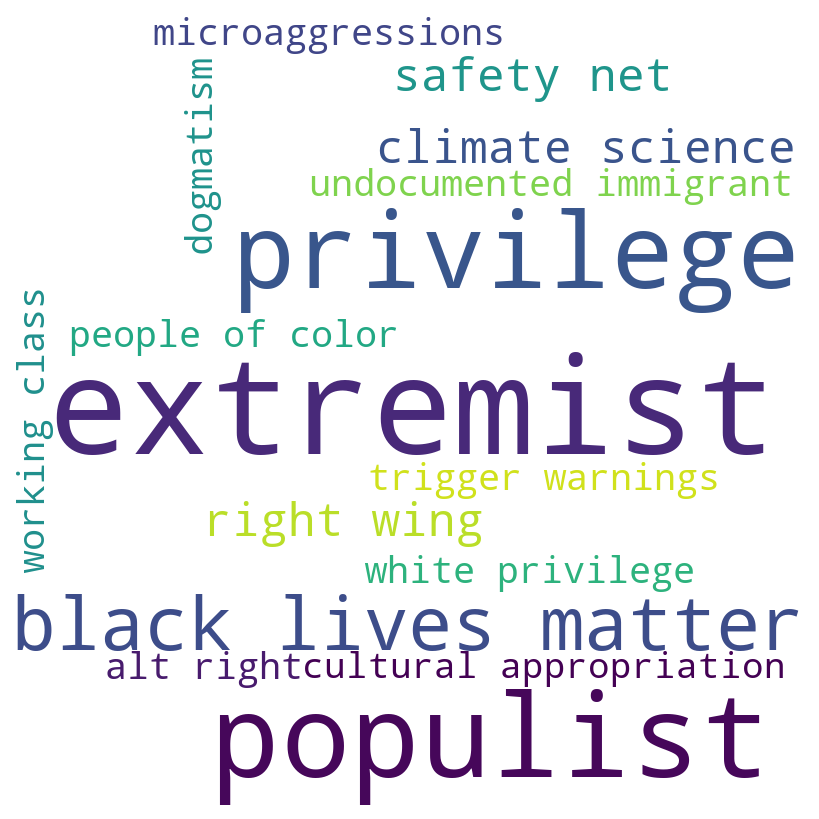

In [29]:
# transform the frequencies by applying a sub-linear scaling. This will make high-frequency words stand out less and preserve the visibility of lower-frequency words. 
# add 1 before raising to the power of 0.75 to prevent any zero frequencies from disappearing 
transformed_frequencies = {word: (freq + 1)**0.75 for word, freq in left_wing_counts.items()}

# generate the word cloud using the transformed frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(transformed_frequencies)

# display the word cloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

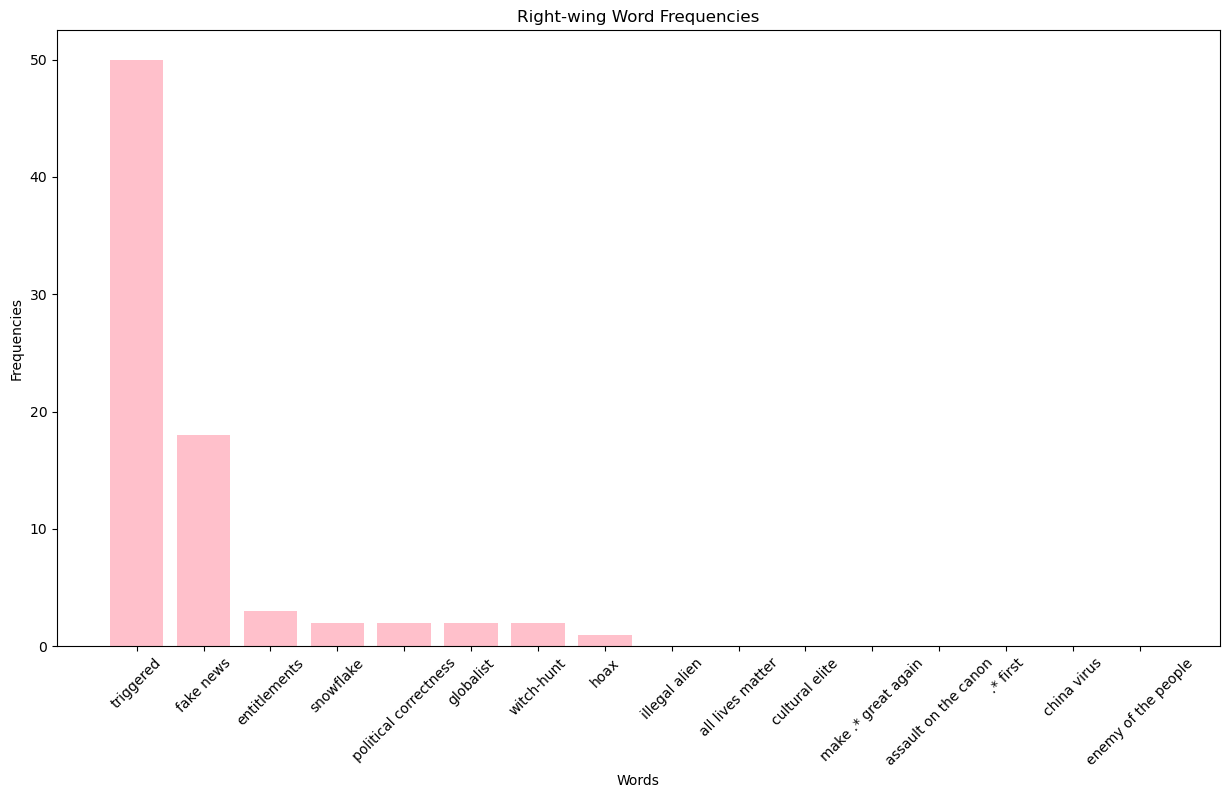

In [30]:
# extract right-wing words data and sort it
right_labels, right_values = zip(*sorted(right_wing_counts.items(), key=lambda x: x[1], reverse=True))

# create a bar chart for right-wing word frequencies
plt.figure(figsize=(15, 8))
plt.bar(right_labels, right_values, color='pink')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Right-wing Word Frequencies')
plt.xticks(rotation=45)
plt.show()

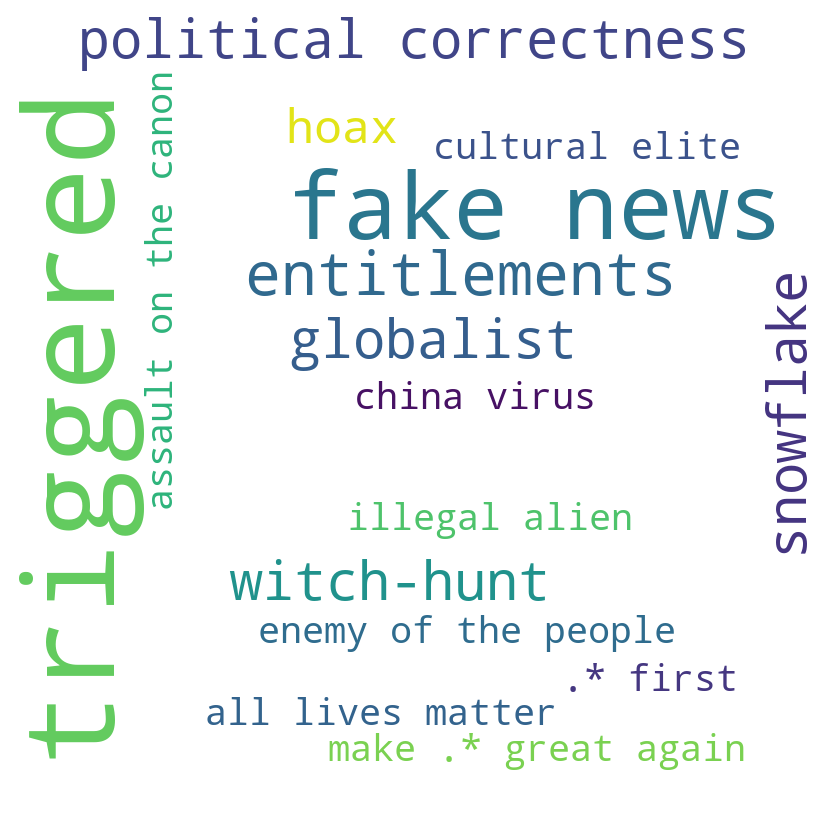

In [31]:
# transform the frequencies by applying a sub-linear scaling. This will make high-frequency words stand out less and preserve the visibility of lower-frequency words. 
# add 1 before raising to the power of 0.75 to prevent any zero frequencies from disappearing 
transformed_frequencies = {word: (freq + 1)**0.75 for word, freq in right_wing_counts.items()}

# generate the word cloud using the transformed frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(transformed_frequencies)

# display the word cloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Left-wing and Right-wing Score

In [32]:
# define article_scores to store left-wing score and right-wing score of the article
article_scores = []

In [33]:
# loop through each article in the 'Text' column of the DataFrame
for text in df['Text']:
    
    # initialize left and right wing scores
    left_score = 0
    right_score = 0
    
    # convert the text to lowercase to ensure case-insensitive matching
    text_lower = text.lower()
    
    # loop through each phrase in the left-wing phrases list
    for phrase in left_wing_phrases:
        
        # count the occurrences of the phrase in the text
        # re.escape is used to escape any special characters in the phrase
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        left_score += phrase_count
    
    # loop through each phrase in the right-wing phrases list
    for phrase in right_wing_phrases:
        
        #similar to above
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        right_score += phrase_count
        
    # append scores to article_scores
    article_scores.append({'left_score': left_score, 'right_score': right_score})

# print the score of each article
for i, scores in enumerate(article_scores):
    print(f"Article {i+1}: Left-wing score = {scores['left_score']}, Right-wing score = {scores['right_score']}")

Article 1: Left-wing score = 1, Right-wing score = 0
Article 2: Left-wing score = 0, Right-wing score = 0
Article 3: Left-wing score = 0, Right-wing score = 0
Article 4: Left-wing score = 0, Right-wing score = 0
Article 5: Left-wing score = 0, Right-wing score = 0
Article 6: Left-wing score = 0, Right-wing score = 0
Article 7: Left-wing score = 0, Right-wing score = 0
Article 8: Left-wing score = 0, Right-wing score = 0
Article 9: Left-wing score = 0, Right-wing score = 1
Article 10: Left-wing score = 0, Right-wing score = 0
Article 11: Left-wing score = 0, Right-wing score = 0
Article 12: Left-wing score = 0, Right-wing score = 0
Article 13: Left-wing score = 0, Right-wing score = 1
Article 14: Left-wing score = 0, Right-wing score = 0
Article 15: Left-wing score = 0, Right-wing score = 0
Article 16: Left-wing score = 0, Right-wing score = 0
Article 17: Left-wing score = 0, Right-wing score = 0
Article 18: Left-wing score = 0, Right-wing score = 0
Article 19: Left-wing score = 0, Righ

In [34]:
# initialize total scores of left and right wing
total_left_score = 0
total_right_score = 0

# loop through the score of each article
for scores in article_scores:
    total_left_score += scores['left_score']
    total_right_score += scores['right_score']

# print total scores of left and right wing
print(f"Total left-wing score: {total_left_score}")
print(f"Total right-wing score: {total_right_score}")

Total left-wing score: 105
Total right-wing score: 80


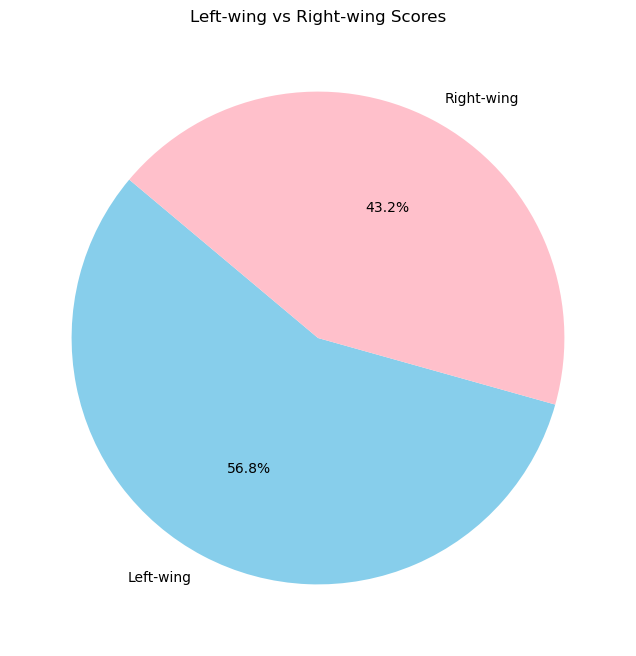

In [35]:
# create pie chart for left-wing and right-wing scores
labels = ['Left-wing', 'Right-wing']
sizes = [total_left_score, total_right_score]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Left-wing vs Right-wing Scores')
plt.show()